## Breast Cancer Prediction

### Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Loading Data

In [10]:
datafile= ('/Users/shubray/Desktop/Breast_cancer_data.csv')

In [12]:
bc_data= pd.read_csv (datafile)

### Data Wrangling

In [15]:
bc_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [17]:
bc_data.shape

(569, 6)

In [19]:
bc_data.info

<bound method DataFrame.info of      mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0

### Checking missing values

In [22]:
bc_data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

There are no missing values in the dataset.

Before analyzing the data, some of the questions that I would explore are:

1. What are the differences in feature measurements between benign and malignant diagnoses?
2. Are there any features showing a solid indicator of benign or malignant?
3. Can we visualize any correlations between features to identify possible cancer presence patterns?


### Exploratory Data Analysis

In [26]:
# distribution of the diagnosis
diagnosis_distribution = bc_data['diagnosis'].value_counts()

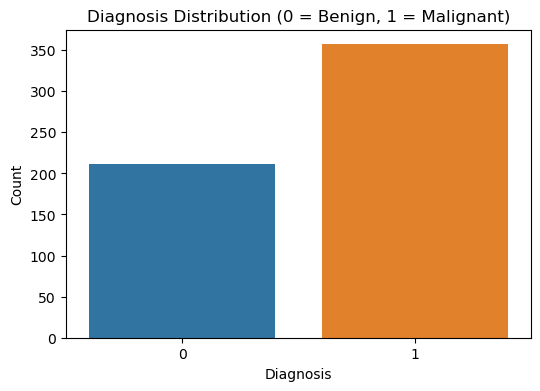

In [30]:
# Plot the diagnosis distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=bc_data)
plt.title('Diagnosis Distribution (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

The visualization shows the diagnosis distributionis where 0= Benign and 1= Malignant. It is a balanced dataset meaning our datset isn't skewed toward benign or malignant.  

In [35]:
# correlation between features and diagnosis
correlation_matrix = bc_data.corr()

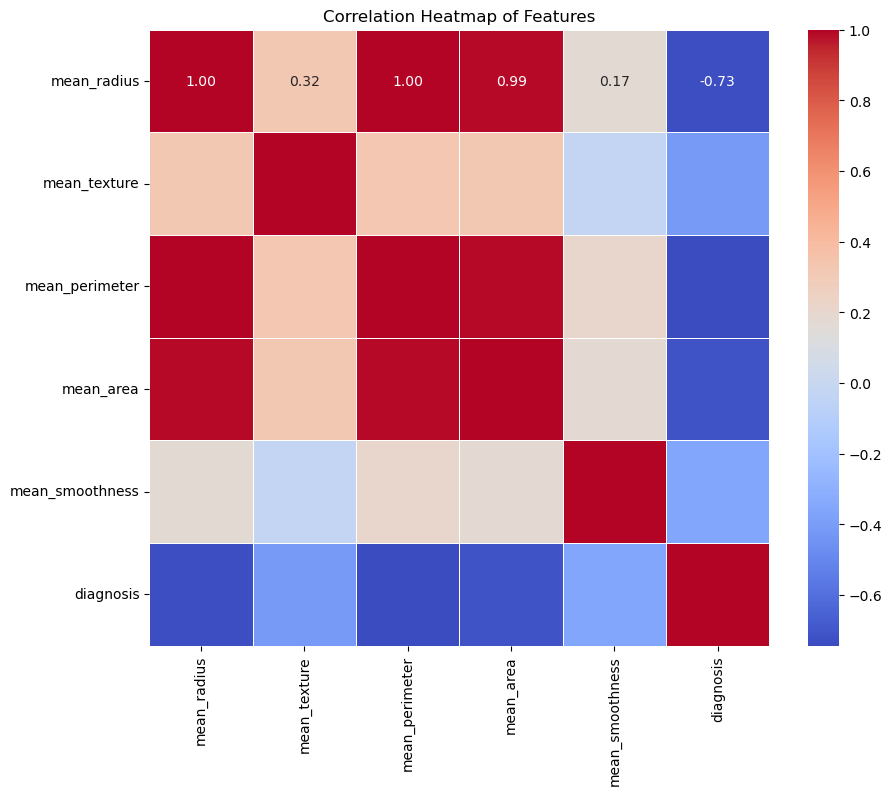

In [37]:
# Plot a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

A heatmap visually represents the correlation matrix, making it easier to identify strong and weak correlations at a glance. Red represents a positive correlation (closer to +1), Blue represents a negative correlation (closer to -1), and light colors represent weak or no correlation. Mean Radius, Perimeter, and Area are highly correlated with each other and are strong indicators of malignancy due to their high negative correlation with the diagnosis.
Mean Texture and Smoothness show weaker correlations with the diagnosis and are less effective in distinguishing between benign and malignant tumors.


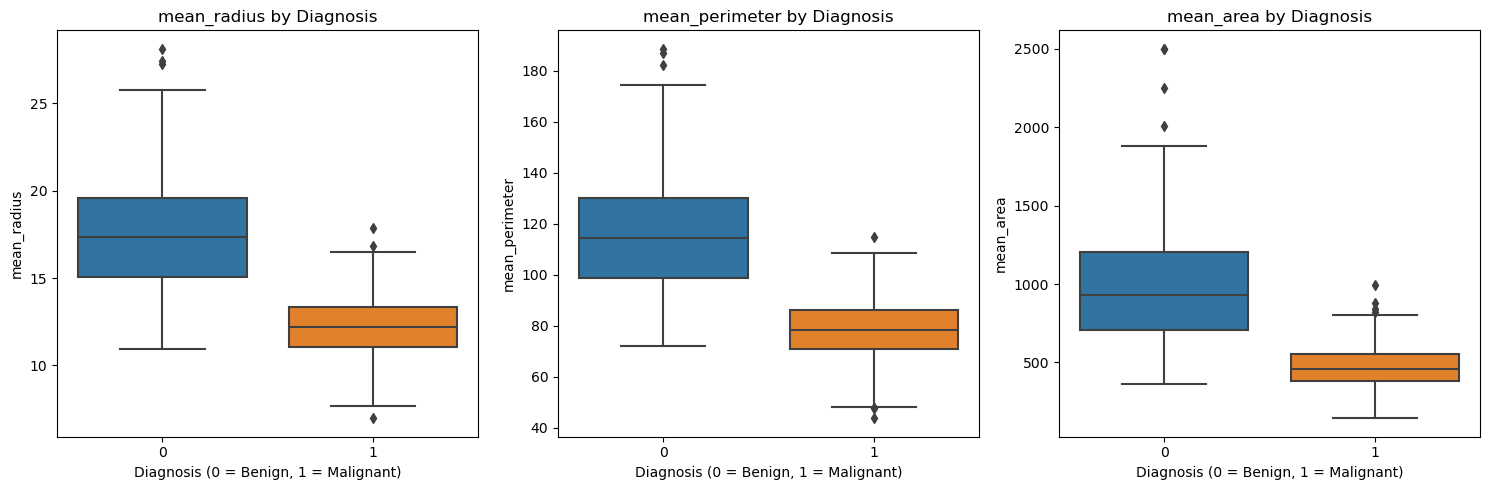

In [43]:
# Plot the distributions of top 3 most correlated features with diagnosis
top_features = ['mean_radius', 'mean_perimeter', 'mean_area']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=bc_data)
    plt.title(f'{feature} by Diagnosis')
    plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


The boxplots of the three most correlated features (mean_radius, mean_perimeter, and mean_area) shows clear differences between benign (0) and malignant (1) cases. For each of these features:
Malignant tumors generally have larger values compared to benign tumors.
The separation in these features makes them useful indicators for diagnosis prediction.
These trends suggest that larger values in these features might indicate a higher likelihood of malignancy.

## Conclusion

The most significant differences between benign and malignant diagnoses are observed in size-related features such as radius, perimeter, and area, with malignant tumors generally being larger and less smooth. These trends highlight that size and irregularity are strong indicators of malignancy in breast cancer diagnosis. 

Feature-to-feature correlations:

Mean Radius, Mean Perimeter, and Mean Area have very high correlations (close to +1) with each other. This means that if the radius is larger, the perimeter and area will also likely be larger. This is expected because these features are related to the tumor size.

Mean Texture and Mean Smoothness have weaker correlations with other features, especially with size-related features like mean_radius, mean_perimeter, and mean_area.

Feature-to-diagnosis correlations:

Diagnosis vs. Mean Radius, Perimeter, and Area: These size-related features have a strong negative correlation with the diagnosis (values around -0.73 to -0.74), suggesting that higher values for these features are associated with a malignant (1) diagnosis, and lower values are associated with a benign (0) diagnosis.

Diagnosis vs. Mean Texture and Smoothness: These features have weaker correlations with the diagnosis, meaning that they are not a strong indicator in predicting whether a tumor is benign or malignant.
